# Settings

In [1]:


import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
import soundfile as sf
import utils

# plt.rcParams["figure.figsize"] = (5,5)
# plt.rc('font', size=20)
# plt.rc('axes', labelsize=25)
# plt.rc('xtick', labelsize=25)
# plt.rc('ytick',labelsize=25)
# plt.rc('legend', fontsize=20)
# plt.rc('figure', titlesize=50)
# plt.rc('figure', autolayout=True)

sr = 16000
win_time = 0.02
dftlen = 512
# Window Sample의 길이 표현
win_len = int(win_time * sr)
hop_len = int(win_len * 0.5)
print("Window Len:",win_len)
print("Hop Len:",hop_len)


Hi
Window Len: 320
Hop Len: 160


## Windowing and Overlapping

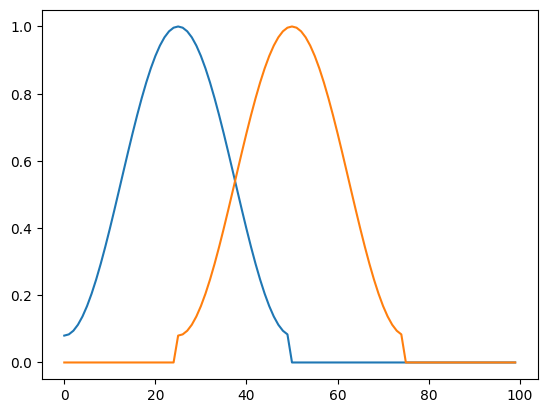

In [2]:

h = lr.filters.get_window(window="hamming", Nx=50)
z = np.zeros_like(h)
h = np.concatenate([h,z])
h2 = np.roll(h,25)
plt.plot(h)
plt.plot(h2)
plt.show()

h3 = h+h2+np.roll(h2,25)
# print(h3)
# plt.plot(h3)
# plt.show()


### OLA를 하려면 hamming은 1.08배 scale이 되어야 하는구나!

Loaded: yonseicrop.wav, Shape: (18000,), Original sr: 16000


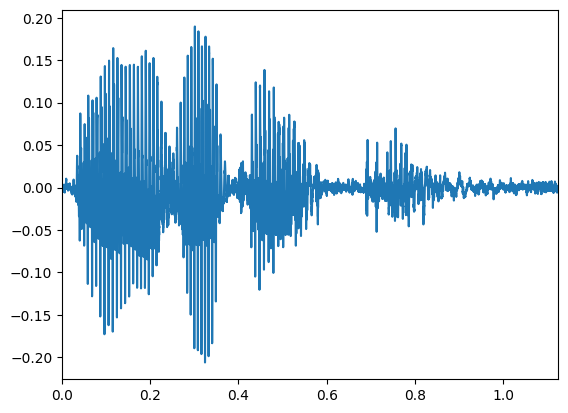

In [3]:
###
### Read input waves
file_path = "yonseicrop.wav"

### Read Audio Files
yr,ori_sr = lr.load(file_path,sr=sr)
print(f"Loaded: {file_path}, Shape: {np.array(yr).shape}, Original sr: {ori_sr}")
    
# Time axis
time = np.linspace(0,len(yr),len(yr),endpoint=False)/sr
plt.plot(time,yr)
# plt.plot(yr)
# plt.ylim(bottom=-0.135, top=0.05)
plt.xlim(0,time[-1])
plt.show()



From 18000 samples, total 111 frames are generated


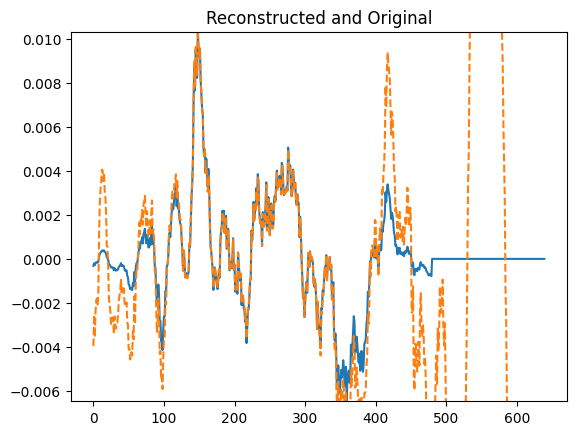

In [30]:
### Frame Extractor
### Extract frames by windowing

FE = utils.FrameExtractor(yr,win_len,hop_len)
frame_arr = FE.extract_frames(win_type="hamming")

# plt.plot(frame_arr[0])
# plt.plot(frame_arr[1])
# plt.show()

x = np.concatenate([frame_arr[0],np.zeros_like(frame_arr[0])])
y = np.concatenate([frame_arr[1],np.zeros_like(frame_arr[1])])
y = np.roll(y,hop_len)
z = x+y / 1.08

plt.plot(z)
plt.ylim(np.min(z),np.max(z))

# plt.show()
plt.plot(yr[:win_len*2],'--')
plt.ylim(np.min(z),np.max(z))
plt.title("Reconstructed and Original")
plt.show()